## SC Analysis of the transactions
+ RFQ: 20
    + Create Asset: 25 per RFQ
    + Bid: 25 per RFQ
+ Accept: 20

Total:  transactions (2h)

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('testloop_20_25.csv', names = ['Txn name', 'Txn #', 'Time', 'Gas', 'Start', 'End'], skiprows = 1)

In [3]:
data.head()

,Txn name,Txn #,Time,Gas,Start,End
0,rfq,#1,343,857998,1.665530e+12,1.665530e+12
1,asset,#1,263,833599,1.665530e+12,1.665530e+12
2,bid,#1,9457,3860172,1.665530e+12,1.665530e+12
3,asset,#2,219,833599,1.665530e+12,1.665530e+12
4,bid,#2,9077,3828772,1.665530e+12,1.665530e+12


In [4]:
data['Txn name'].replace({'asset': 'create'}, inplace =True)
data.head()

,Txn name,Txn #,Time,Gas,Start,End
0,rfq,#1,343,857998,1.665530e+12,1.665530e+12
1,create,#1,263,833599,1.665530e+12,1.665530e+12
2,bid,#1,9457,3860172,1.665530e+12,1.665530e+12
3,create,#2,219,833599,1.665530e+12,1.665530e+12
4,bid,#2,9077,3828772,1.665530e+12,1.665530e+12


In [5]:
data['Txn name'].replace({'rfq': 'RFQ', 'create': 'CREATE', 'bid': 'BID', 'accept': 'ACCEPT'}, inplace =True)
data.head()

,Txn name,Txn #,Time,Gas,Start,End
0,RFQ,#1,343,857998,1.665530e+12,1.665530e+12
1,CREATE,#1,263,833599,1.665530e+12,1.665530e+12
2,BID,#1,9457,3860172,1.665530e+12,1.665530e+12
3,CREATE,#2,219,833599,1.665530e+12,1.665530e+12
4,BID,#2,9077,3828772,1.665530e+12,1.665530e+12


In [6]:
len(data)

1040

In [7]:
data.dropna(inplace=True)

In [8]:
len(data)

1040

In [9]:
data.tail()

,Txn name,Txn #,Time,Gas,Start,End
1035,CREATE,#24,225,833611,1.665540e+12,1.665540e+12
1036,BID,#24,10931,3828784,1.665540e+12,1.665540e+12
1037,CREATE,#25,225,833611,1.665540e+12,1.665540e+12
1038,BID,#25,11027,3828784,1.665540e+12,1.665540e+12
1039,ACCEPT,#20,1453,226168,1.665540e+12,1.665540e+12


In [10]:
data_sc = data.loc[:, ['Txn name', 'Time']]
data_sc.head()

,Txn name,Time
0,RFQ,343
1,CREATE,263
2,BID,9457
3,CREATE,219
4,BID,9077


### SCDB data

In [11]:
data_scdb = pd.read_csv('scdb-output.csv')

In [12]:
data_scdb.head()

,Txn name,Time
0,BID,87
1,BID,188
2,BID,87
3,BID,88
4,BID,86


In [13]:
# data_scdb['Txn name'].replace({'RFQ': 'RFQ_s', 'CREATE': 'CREATE_s', 'BID': 'BID_s', 'ACCEPT': 'ACCEPT_s', 'RETURN': 'RETURN_s'}, inplace =True)
# data_scdb.head()

In [14]:
frames = [data_sc, data_scdb]
result = pd.concat(frames)
len(result)

2472

In [15]:
result.tail()

,Txn name,Time
1427,RETURN,1172
1428,RETURN,1071
1429,RETURN,613
1430,RETURN,597
1431,RETURN,1263


## Plots

### Combined: sc + scdb

In [16]:
result.iloc[1039:1041]

,Txn name,Time
1039,ACCEPT,1453
0,BID,87


In [17]:
sc_list = ['SC']*1040
s_list = ['SCDB']*1432
approach = sc_list + s_list
len(approach)

2472

In [18]:
result["Approach"] = approach
result.head()

,Txn name,Time,Approach
0,RFQ,343,SC
1,CREATE,263,SC
2,BID,9457,SC
3,CREATE,219,SC
4,BID,9077,SC


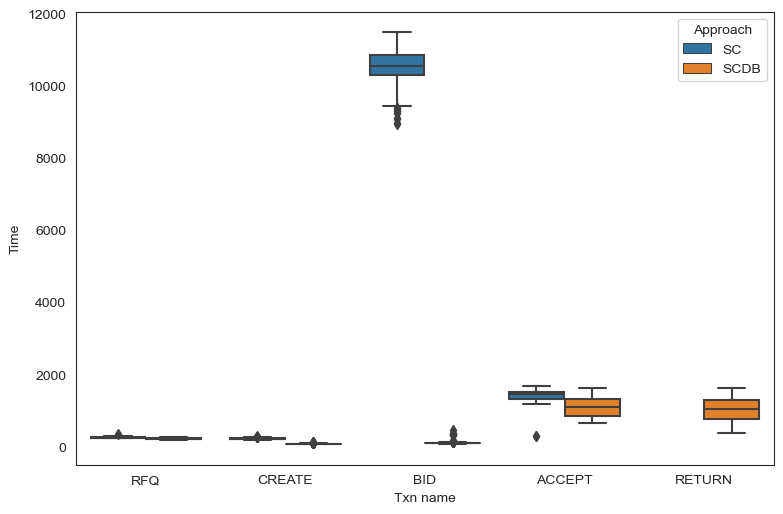

In [19]:
plt.figure(figsize=(9, 6), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=result, hue='Approach');

### RFQ

In [122]:
r_df1 = result.loc[(result['Txn name'] == 'RFQ_sc')]
len(r_df1)

20

In [123]:
r_df2 = result.loc[(result['Txn name'] == 'RFQ_s')]
r_df2.head()

,Txn name,Time,Approach
997,RFQ_s,234,SCDB
998,RFQ_s,210,SCDB
999,RFQ_s,225,SCDB
1000,RFQ_s,194,SCDB
1001,RFQ_s,188,SCDB


In [124]:
frames_r = [r_df1, r_df2]
rfq_df = pd.concat(frames_r)
rfq_df.head()

,Txn name,Time,Approach
0,RFQ_sc,343,SC
52,RFQ_sc,233,SC
104,RFQ_sc,243,SC
156,RFQ_sc,238,SC
208,RFQ_sc,227,SC


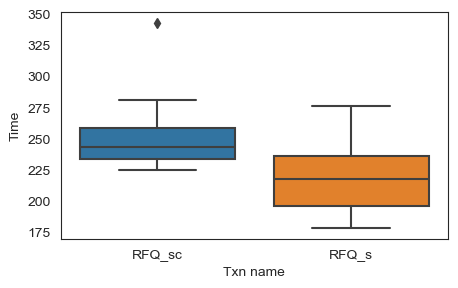

In [125]:
plt.figure(figsize=(5, 3), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=rfq_df);

### CREATE

In [126]:
c_df1 = result.loc[(result['Txn name'] == 'CREATE_sc')]
c_df2 = result.loc[(result['Txn name'] == 'CREATE_s')]
frames_c = [c_df1, c_df2]
c_df = pd.concat(frames_c)
c_df.head()

,Txn name,Time,Approach
1,CREATE_sc,263,SC
3,CREATE_sc,219,SC
5,CREATE_sc,208,SC
7,CREATE_sc,194,SC
9,CREATE_sc,214,SC


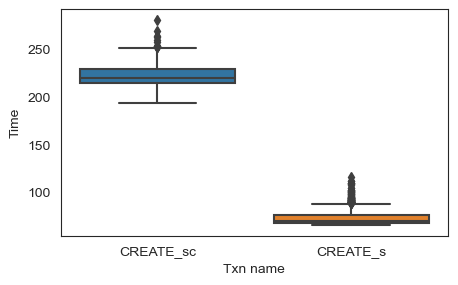

In [127]:
plt.figure(figsize=(5, 3), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=c_df);

### RFQ & Create

In [128]:
rc_df = pd.concat([rfq_df, c_df])
rc_df.head()

,Txn name,Time,Approach
0,RFQ_sc,343,SC
52,RFQ_sc,233,SC
104,RFQ_sc,243,SC
156,RFQ_sc,238,SC
208,RFQ_sc,227,SC


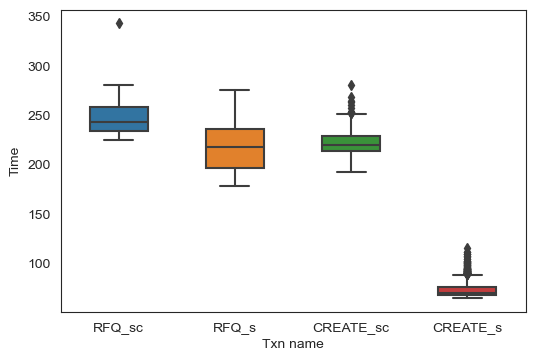

In [129]:
plt.figure(figsize=(6, 4), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=rc_df, width = 0.5);

### Bid

In [130]:
b_df1 = result.loc[(result['Txn name'] == 'BID_sc')]
b_df2 = result.loc[(result['Txn name'] == 'BID_s')]
frames_b = [b_df1, b_df2]
b_df = pd.concat(frames_b)
b_df.head()

,Txn name,Time,Approach
2,BID_sc,9457,SC
4,BID_sc,9077,SC
6,BID_sc,9103,SC
8,BID_sc,8957,SC
10,BID_sc,9384,SC


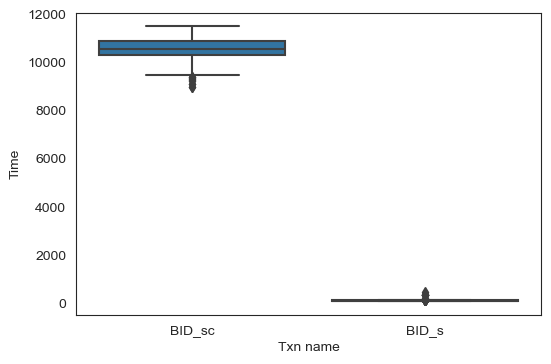

In [131]:
plt.figure(figsize=(6, 4), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=b_df);

### Accept

In [132]:
ac_df1 = result.loc[(result['Txn name'] == 'ACCEPT_sc')]
ac_df2 = result.loc[(result['Txn name'] == 'ACCEPT_s')]
frames_ac = [ac_df1, ac_df2]
ac_df = pd.concat(frames_ac)
ac_df.head()

,Txn name,Time,Approach
51,ACCEPT_sc,296,SC
103,ACCEPT_sc,295,SC
155,ACCEPT_sc,1402,SC
207,ACCEPT_sc,1316,SC
259,ACCEPT_sc,1469,SC


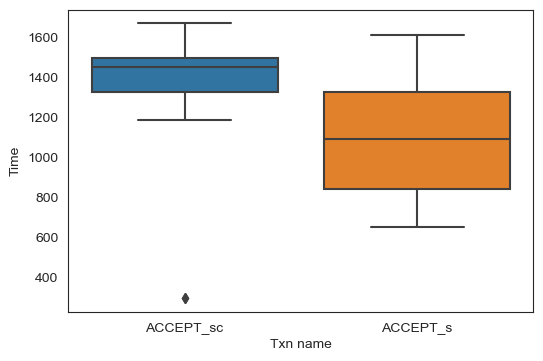

In [133]:
plt.figure(figsize=(6, 4), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=ac_df);

### Return

In [134]:
return_df = result.loc[(result['Txn name'] == 'RETURN_s')]

### ALL Transactions in one

In [135]:
frames_all = [rfq_df, c_df, b_df, ac_df, return_df]
all_df = pd.concat(frames_all)
all_df.head()

,Txn name,Time,Approach
0,RFQ_sc,343,SC
52,RFQ_sc,233,SC
104,RFQ_sc,243,SC
156,RFQ_sc,238,SC
208,RFQ_sc,227,SC


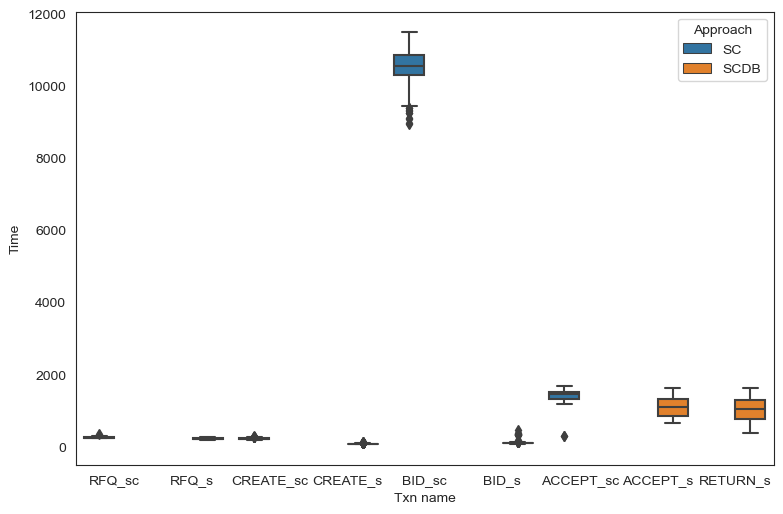

In [136]:
plt.figure(figsize=(9, 6), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=all_df, hue='Approach');

In [107]:
len(all_df)

2472

In [111]:
all_df.iloc[1045:1050]

,Txn name,Time
16,BID_sc,9613
18,BID_sc,9738
20,BID_sc,9236
22,BID_sc,9333
24,BID_sc,9651


In [105]:
all_df.tail()

,Txn name,Time
1427,RETURN_s,1172
1428,RETURN_s,1071
1429,RETURN_s,613
1430,RETURN_s,597
1431,RETURN_s,1263


### BID, ACCEPT, RETURN

In [97]:
frames_bar = [b_df, ac_df, return_df]
bar_df = pd.concat(frames_bar)

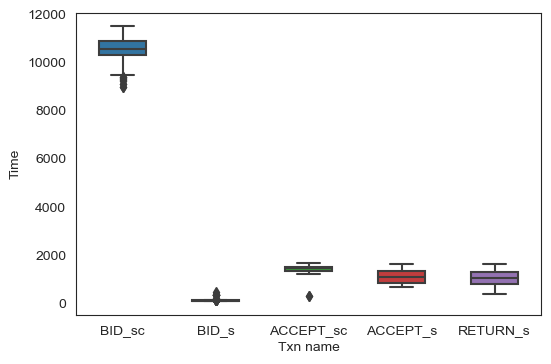

In [100]:
plt.figure(figsize=(6, 4), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=bar_df, width=0.5);

### SC Plots

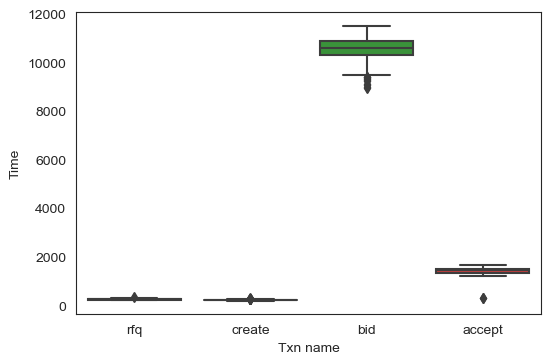

In [12]:
plt.figure(figsize=(6, 4), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=data);

In [26]:
# Remove outlier in bid
#data[(data['Txn name'] == 'bid') & (data['Time'] > 175000)]

In [27]:
#data_parsed = data.drop(707, axis=0)

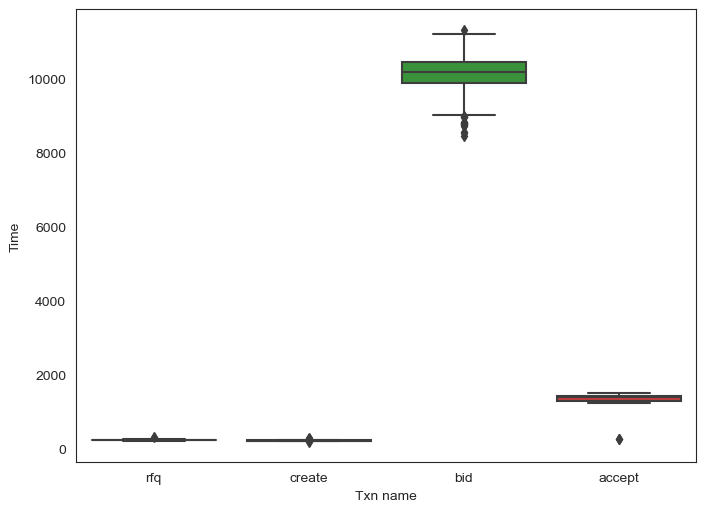

In [50]:
plt.figure(figsize=(8, 6), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=data );

In [30]:
data_log = data.copy()
data_log.head()

,Txn name,Txn #,Time,Gas,Start,End
0,rfq,#1,323,857998,1665428133132,1665428133455
1,create,#1,279,833599,1665428133718,1665428133996
2,bid,#1,9308,3860172,1665428134261,1665428143569
3,create,#2,199,833599,1665428143757,1665428143956
4,bid,#2,8451,3828772,1665428144140,1665428152591


In [31]:
data_log['Time'] = data_log['Time'].apply(np.log)

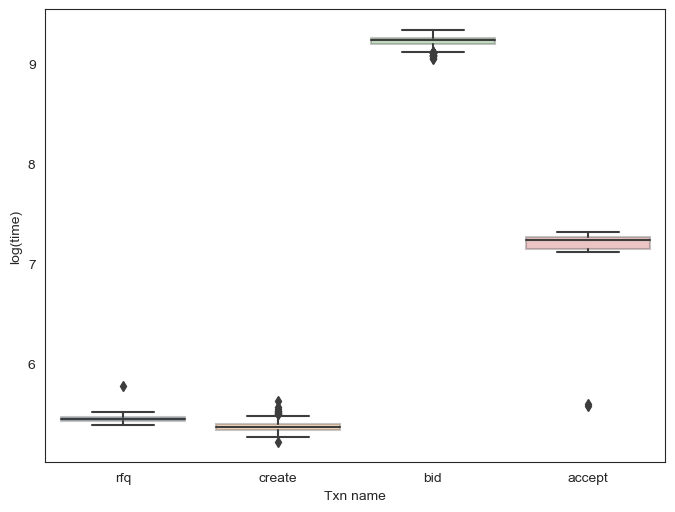

In [32]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

sns.boxplot(x='Txn name', y='Time', data=data_log, ax=ax, boxprops=dict(alpha=.3));
ax.set_ylabel('log(time)');

## Original

In [10]:
len(data)

1040

In [11]:
rfq_count = 0
asset_count = 0
bid_count = 0
accept_count = 0

In [12]:
for i in range(0, len(data)):
    if data.iloc[i]['Txn name'] == 'rfq':
        rfq_count += 1
    if data.iloc[i]['Txn name'] == 'asset':
        asset_count += 1    
    if data.iloc[i]['Txn name'] == 'bid':
        bid_count += 1   
    if data.iloc[i]['Txn name'] == 'accept':
        accept_count += 1 

print(f"#RFQs {rfq_count}")
print(f"#BIDs =  {bid_count}")
print(f"#CREATEs =  {asset_count}")
print(f"#ACCEPTs =  {accept_count}")

#RFQs 20
#BIDs =  500
#CREATEs =  0
#ACCEPTs =  20


In [13]:
df_create = data[(data['Txn name'] == "create")]
len(df_create)
#df_create.head()

500

In [14]:
df_rfq = data[(data['Txn name'] == "rfq")]
len(df_rfq)
#df_rfq.head()

20

In [15]:
df_bid = data[(data['Txn name'] == "bid")]
len(df_bid)
#df_bid.head()

500

In [16]:
df_accept = data[(data['Txn name'] == "accept")]
len(df_accept)
#df_accept.head()

20

In [17]:
rfq_min = df_rfq["Time"].min()
rfq_max = df_rfq["Time"].max()
rfq_mean = df_rfq["Time"].mean()
rfq_median = df_rfq["Time"].median()
rfq_std = df_rfq["Time"].std()

print("RFQ Min: ", rfq_min)
print("RFQ Max: ", rfq_max)
print("RFQ Mean: ", rfq_mean)
print("RFQ Median: ", rfq_median)
print("RFQ Standard Deviation: ", rfq_std)

rfq_dict = {
               'min': rfq_min,
               'max': rfq_max,
               'average': rfq_mean,
               'median' : rfq_median,
               'standard_deviation' : rfq_std
              }

RFQ Min:  225
RFQ Max:  343
RFQ Mean:  250.6
RFQ Median:  243.0
RFQ Standard Deviation:  26.888463579836806


In [18]:
create_min = df_create["Time"].min()
create_max = df_create["Time"].max()
create_mean = df_create["Time"].mean()
create_median = df_create["Time"].median()
create_std = df_create["Time"].std()

print("Create Asset Min: ", create_min)
print("Create Asset Max: ", create_max)
print("Create Asset Mean: ", create_mean)
print("Create Asset Median: ", create_median)
print("Create Asset Standard Deviation: ", create_std)

create_dict = {
               'min': create_min,
               'max': create_max,
               'average': create_mean,
               'median' : create_median,
               'standard_deviation' : create_std
              }

Create Asset Min:  193
Create Asset Max:  281
Create Asset Mean:  222.476
Create Asset Median:  220.0
Create Asset Standard Deviation:  12.020082727567027


In [19]:
bid_min = df_bid["Time"].min()
bid_max = df_bid["Time"].max()
bid_mean = df_bid["Time"].mean()
bid_median = df_bid["Time"].median()
bid_std = df_bid["Time"].std()

print("Bid Min: ", bid_min)
print("Bid Max: ", bid_max)
print("Bid Mean: ", bid_mean)
print("Bid Median: ", bid_median)
print("Bid Standard Deviation: ", bid_std)

bid_dict = {
               'min': bid_min,
               'max': bid_max,
               'average': bid_mean,
               'median' : bid_median,
               'standard_deviation' : bid_std
              }

Bid Min:  8957
Bid Max:  11487
Bid Mean:  10543.112
Bid Median:  10564.0
Bid Standard Deviation:  452.2912581738022


In [20]:
accept_min = df_accept["Time"].min()
accept_max = df_accept["Time"].max()
accept_mean = df_accept["Time"].mean()
accept_median = df_accept["Time"].median()
accept_std = df_accept["Time"].std()

print("Accept Min: ", accept_min)
print("Accept Max: ", accept_max)
print("Accept Mean: ", accept_mean)
print("Accept Median: ", accept_median)
print("Accept Standard Deviation: ", accept_std)

accept_dict = {
               'min': accept_min,
               'max': accept_max,
               'average': accept_mean,
               'median' : accept_median,
               'standard_deviation' : accept_std
              }

Accept Min:  295
Accept Max:  1671
Accept Mean:  1338.95
Accept Median:  1452.0
Accept Standard Deviation:  377.47366237854754


In [21]:
list_of_dict = [create_dict, rfq_dict, bid_dict, accept_dict]
results = pd.DataFrame(list_of_dict, index = ['CREATE','RFQ', 'BID', 'ACCEPT'])
results

,min,max,average,median,standard_deviation
CREATE,193,281,222.476,220.0,12.020083
RFQ,225,343,250.600,243.0,26.888464
BID,8957,11487,10543.112,10564.0,452.291258
ACCEPT,295,1671,1338.950,1452.0,377.473662


In [45]:
#results.rename(columns={ results.columns[1]: "Txn Name"}, inplace=True)
#results.index.name = "Txn Name"
results.reset_index(inplace=True)
results

,index,min,max,average,median,standard_deviation
0,CREATE,185,279,216.102,215.0,10.307088
1,RFQ,218,323,236.300,231.0,21.812840
2,BID,8451,11324,10132.802,10187.0,496.400195
3,ACCEPT,265,1504,1269.950,1386.5,352.080654


In [46]:
results.rename(columns={ results.columns[0]: "Txn Name"}, inplace=True)
results

,Txn Name,min,max,average,median,standard_deviation
0,CREATE,185,279,216.102,215.0,10.307088
1,RFQ,218,323,236.300,231.0,21.812840
2,BID,8451,11324,10132.802,10187.0,496.400195
3,ACCEPT,265,1504,1269.950,1386.5,352.080654


In [52]:
plt.figure(figsize=(8, 6), dpi=100)

sns.boxplot(x='Txn name', y='average', data=results);

ValueError: Could not interpret input 'Txn name'

<Figure size 800x600 with 0 Axes>

In [47]:
total = { "CREATE": {
              'min': create_min,
              'max': create_max
          },
          "RFQ": {
              'min': rfq_min,
              'max': rfq_max
          },
          "BID": {
              'min': bid_min,
              'max': bid_max
          },
          "ACCEPT": {
                'min': accept_min,
                'max': accept_max
          } 
}
total

{'ACCEPT': {'max': 1504, 'min': 265},
 'BID': {'max': 11324, 'min': 8451},
 'CREATE': {'max': 279, 'min': 185},
 'RFQ': {'max': 323, 'min': 218}}

KeyError: 216.102

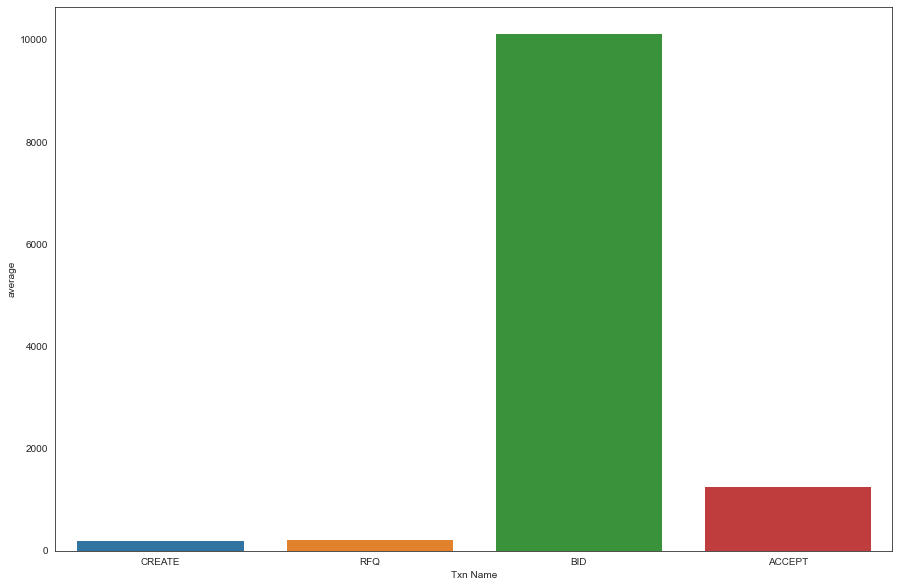

In [48]:
# plot the figure
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Txn Name', y='average', data=results, ax=ax)

# add the lines for the errors 
for p in ax.patches:
    x = p.get_x()  # get the bottom left x corner of the bar
    w = p.get_width()  # get width of bar
    h = p.get_height()  # get height of bar
    min_y = total[h]['min']  # use h to get min from dict z
    max_y = total[h]['max']  # use h to get max from dict z
    plt.vlines(x+w/2, min_y, max_y, color='k')  # draw a vertical line